# **Aprendizaje no supervisado**

## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Vamos a leer y realizar una exploración inicial de nuestros datos


In [ ]:
df = pd.read_csv('/content/wine_original.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### Estadisticas básicas

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,13.006369,2.332849,2.366760,19.472626,99.888268,2.297877,2.034972,0.361508,1.594860,5.060950,0.957911,2.618436,748.653631
std,0.813191,1.114987,0.273592,3.343530,14.376902,0.625186,0.998967,0.124189,0.573204,2.312081,0.228012,0.713730,314.903646
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.365000,1.605000,2.210000,17.150000,88.000000,1.745000,1.210000,0.270000,1.250000,3.230000,0.785000,1.945000,501.000000
50%,13.050000,1.860000,2.360000,19.500000,98.000000,2.360000,2.140000,0.340000,1.560000,4.700000,0.970000,2.780000,675.000000
75%,13.685000,3.065000,2.555000,21.500000,107.500000,2.800000,2.885000,0.435000,1.955000,6.200000,1.120000,3.175000,987.500000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Boxplots

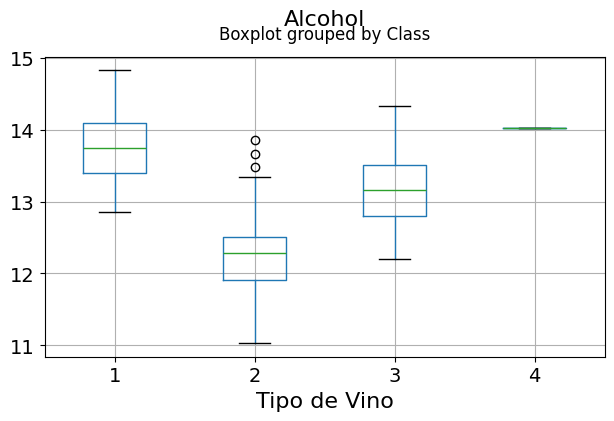

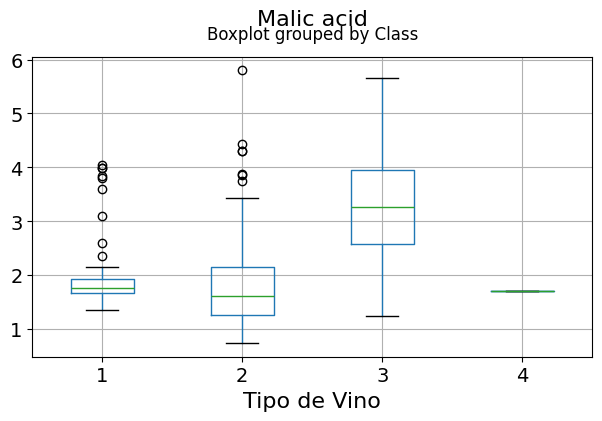

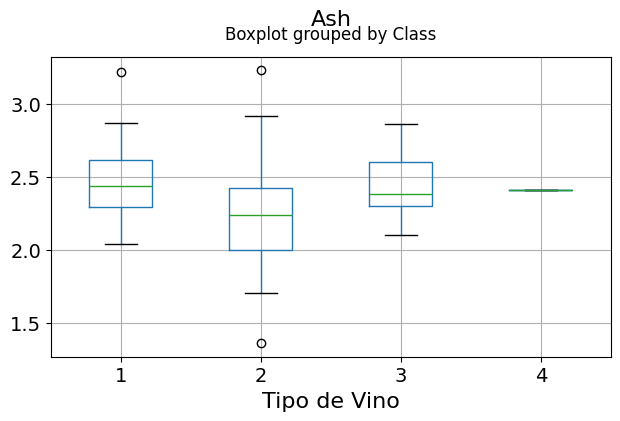

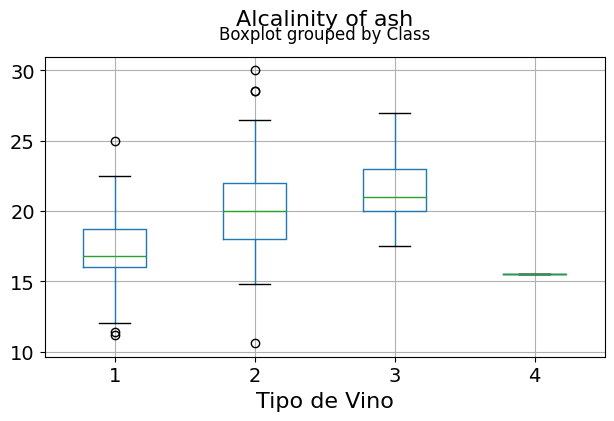

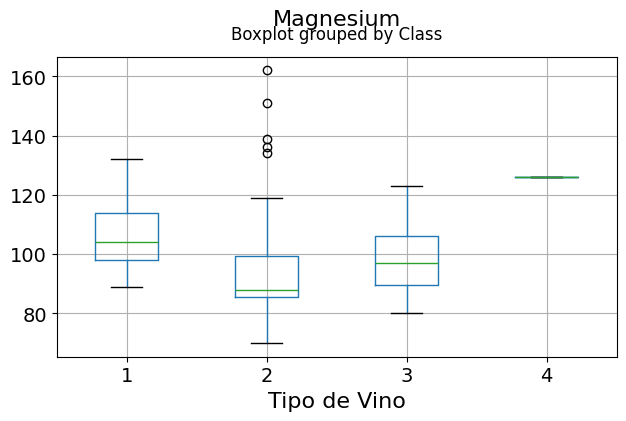

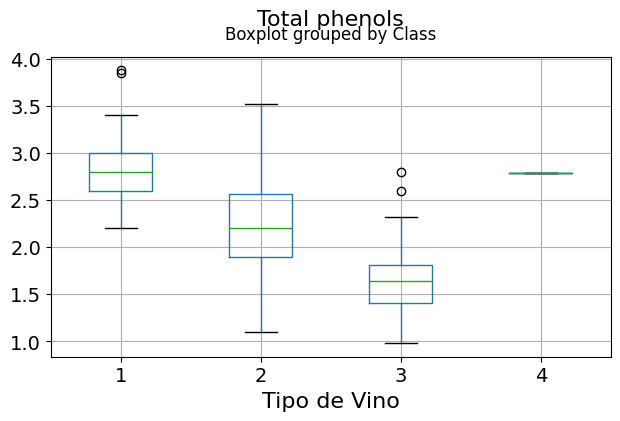

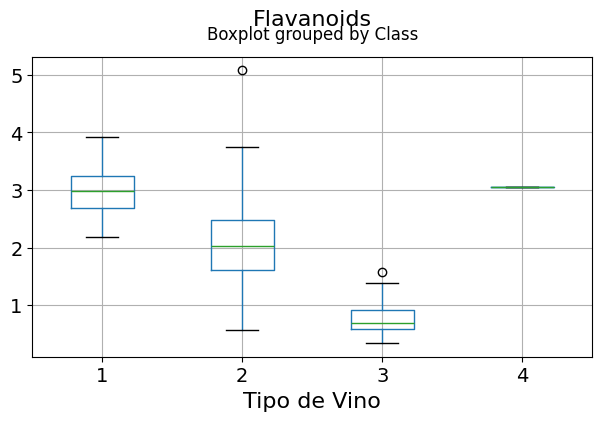

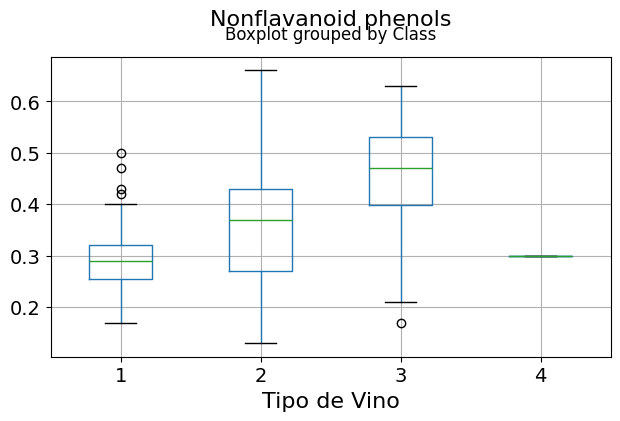

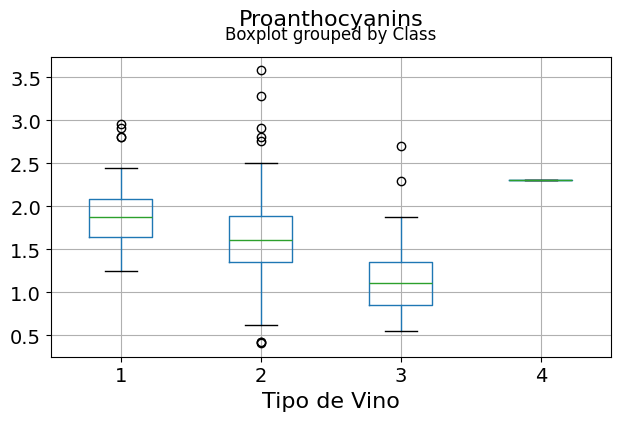

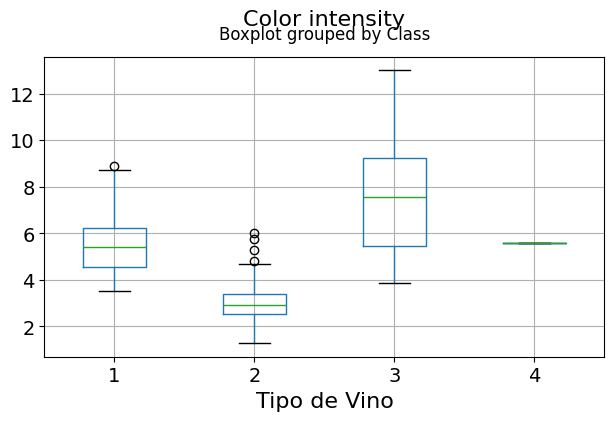

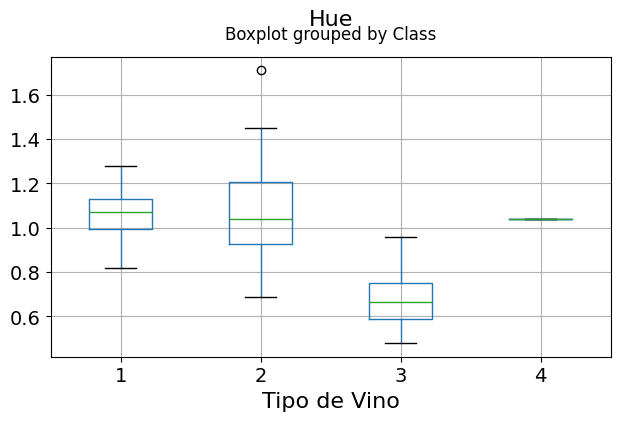

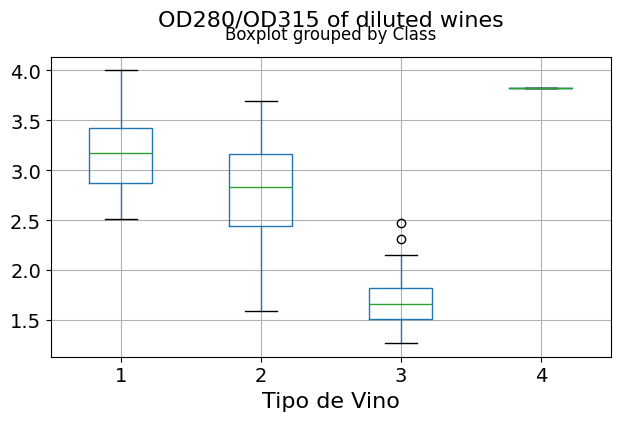

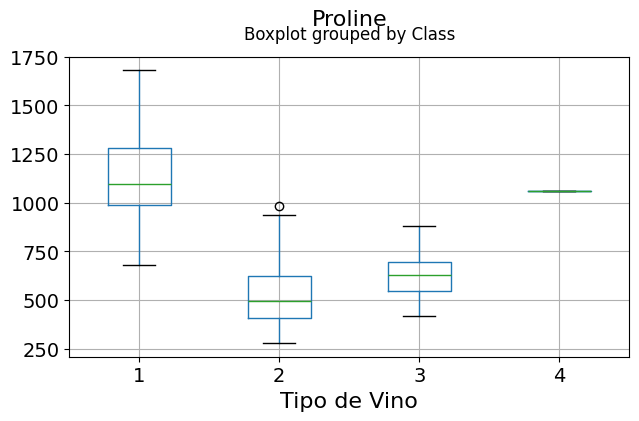

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Tipo de Vino", fontsize=16)

**Se puede ver que algunas características diferencian los tipos de vino de manera bastante clara**. Por ejemplo, la Alcalinidad, los Fenoles Totales o los Flavonoides producen diagramas de caja con medianas bien separadas, lo que indica claramente las clases de vino.

A continuación se muestra un ejemplo de separación de clases utilizando dos variables.

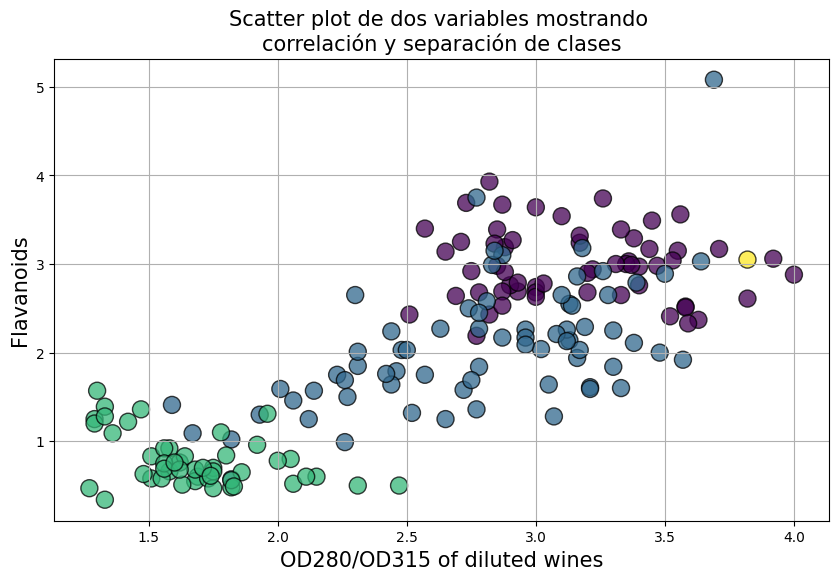

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot de dos variables mostrando \ncorrelación y separación de clases",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

#### Como sabes si todas las caracteristicas son independientes? *Una matrix de covariance*

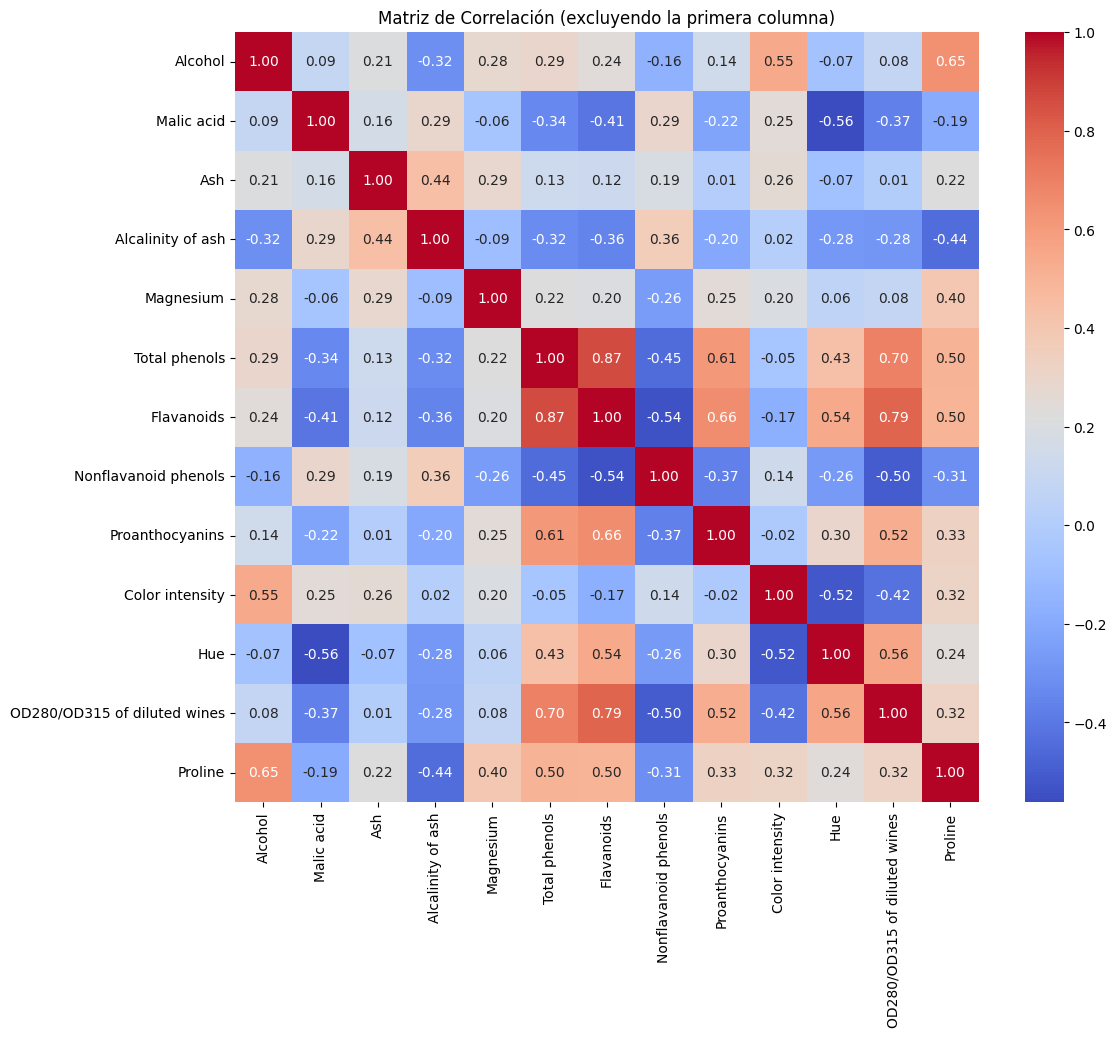

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (excluyendo la primera columna)')
plt.show()


Interpretación: Se puede observar que existe una buena correlación entre varias características, es decir, no son independientes entre sí, es decir, existe redundancia de información.

## Análisis de componentes principales


In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
nuevo_df = df[['OD280/OD315 of diluted wines', 'Flavanoids']]
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(nuevo_df)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


<ipython-input-112-4c3ec7613a18>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)


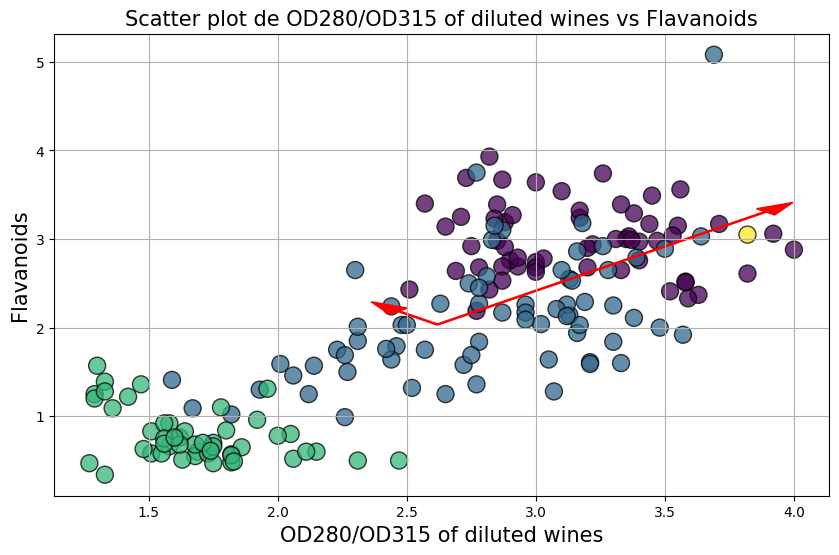

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

centroide = np.mean(nuevo_df, axis=0)

plt.figure(figsize=(10, 6))
plt.scatter(nuevo_df['OD280/OD315 of diluted wines'],nuevo_df['Flavanoids'], c=df['Class'], edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Scatter plot de OD280/OD315 of diluted wines vs Flavanoids", fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines", fontsize=15)
plt.ylabel("Flavanoids", fontsize=15)

for i in range(pca.n_componentes):
  vector = pca.vectores_propios[:, i] * pca.valores_propios[i]
  plt.arrow(centroide[0], centroide[1], vector[0], vector[1], color='r', width=0.01, head_width=0.1)

plt.show()

### Normalización de datos
Recuerde que PCA requiere escalamiento/normalización de los datos para funcionar correctamente (eliminar la variabilidad de escala entre las caracteristicas)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Class',axis=1)
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.508949,-0.560183,0.231797,-1.161494,1.891074,0.805411,1.028967,-0.658164,1.216127,0.251148,0.361032,1.828723,1.007399
1,0.238781,-0.497226,-0.831151,-2.481160,0.007793,0.564809,0.727814,-0.819661,-0.550839,-0.295344,0.405012,1.098113,0.959632
2,0.189454,0.024419,1.111477,-0.261721,0.077545,0.805411,1.209658,-0.496668,2.125853,0.268497,0.317052,0.774959,1.389537
3,1.681593,-0.344330,0.488370,-0.801585,0.914558,2.489623,1.460619,-0.981157,1.023685,1.187992,-0.430614,1.168364,2.328959
4,0.288108,0.231278,1.844544,0.458096,1.263314,0.805411,0.657545,0.230064,0.393876,-0.321368,0.361032,0.437754,-0.043480
5,1.471954,-0.515213,0.305103,-1.281463,0.844807,1.559296,1.360235,-0.173676,0.656296,0.732582,0.405012,0.325352,2.233425
6,1.706257,-0.416281,0.305103,-1.461418,-0.271211,0.324207,0.486892,-0.496668,0.673791,0.081996,0.273071,1.351016,1.723908
7,1.299310,-0.164452,0.891557,-0.561646,1.472567,0.484609,0.476853,-0.415920,-0.603323,-0.004749,0.448993,1.351016,1.739830
8,2.248853,-0.623140,-0.721191,-1.641372,-0.201460,0.805411,0.948659,-0.577416,0.673791,0.060309,0.536953,0.325352,0.943710
9,1.052675,-0.883962,-0.354657,-1.041524,-0.131709,1.094133,1.119312,-1.142653,0.446360,0.936432,0.229091,1.308866,0.943710


In [ ]:
dfx.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02,1.790000e+02
mean,-1.786281e-15,-1.587805e-16,7.306384e-16,-2.381707e-16,-4.167988e-16,-3.572561e-16,1.190854e-16,-6.351220e-16,-1.984756e-16,2.480945e-16,-1.190854e-16,-6.351220e-16,7.939025e-17
std,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00,1.002805e+00
min,-2.437205e+00,-1.432588e+00,-3.690113e+00,-2.661114e+00,-2.084740e+00,-2.113890e+00,-1.701485e+00,-1.869386e+00,-2.072880e+00,-1.639888e+00,-2.101867e+00,-1.894579e+00,-1.498788e+00
25%,-7.909186e-01,-6.546183e-01,-5.745772e-01,-6.966114e-01,-8.292201e-01,-8.868211e-01,-8.281420e-01,-7.389126e-01,-6.033235e-01,-7.941268e-01,-7.604668e-01,-9.461904e-01,-7.886486e-01
50%,5.380492e-02,-4.252745e-01,-2.477685e-02,8.210212e-03,-1.317088e-01,9.964584e-02,1.054315e-01,-1.736760e-01,-6.098718e-02,-1.565525e-01,5.316953e-02,2.270009e-01,-2.345487e-01
75%,8.368698e-01,6.584872e-01,6.899636e-01,6.080584e-01,5.309268e-01,8.054108e-01,8.532942e-01,5.934307e-01,6.300542e-01,4.940334e-01,7.128747e-01,7.819836e-01,7.606020e-01
max,2.248853e+00,3.118311e+00,3.164065e+00,3.157413e+00,4.332363e+00,2.537743e+00,3.056728e+00,2.410262e+00,3.472946e+00,3.443356e+00,3.307715e+00,1.941125e+00,2.965856e+00


### Análisis de PCA

In [ ]:
pca = PCA(n_componentes=2)
pca_proyeccion = pca.run(X)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [ ]:
porcentaje_explicacion_varianza = pca.valores_propios/np.sum(pca.valores_propios) * 100

#### Grafica explicando el % de de explicación de la varianza de cada componente

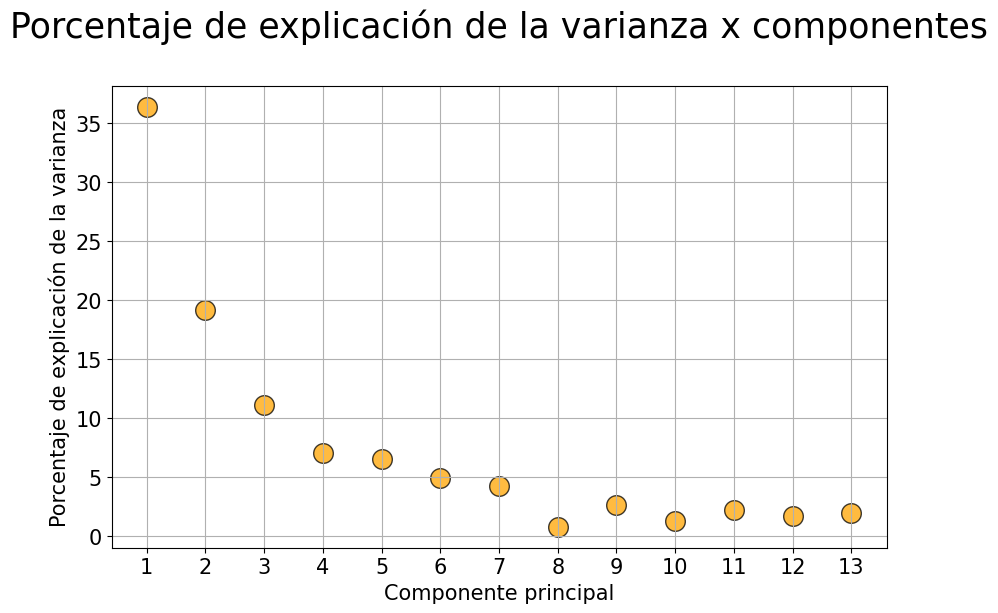

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(porcentaje_explicacion_varianza))],
            y=porcentaje_explicacion_varianza,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Porcentaje de explicación de la varianza x componentes\n",fontsize=25)
plt.xlabel("Componente principal",fontsize=15)
plt.xticks([i+1 for i in range(len(porcentaje_explicacion_varianza))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Porcentaje de explicación de la varianza",fontsize=15)
plt.show()

****La gráfica anterior indica que el primer componente principal explica aproximadamente el 36% de la varianza total de los datos y el segundo componente explica un 20% adicional. Por lo tanto, si solo consideramos los dos primeros componentes, juntos explican el 56 % de la varianza total.**

### Separación de tipos de vino utilizando solo los 2 mejores componentes

In [ ]:
dfx_trans = pd.DataFrame(data=pca_proyeccion)
dfx_trans.head(10)

,0,1
0,-3.312821,1.410403
1,-2.190739,-0.358144
2,-2.501594,1.006164
3,-3.756309,2.718077
4,-0.996828,0.853626
5,-3.048723,2.085505
6,-2.439261,1.150364
7,-2.055219,1.582926
8,-2.502308,0.885882
9,-2.739550,0.762037


#### Grafica de las dos columnas de este conjunto de datos transformados, con el color establecido en la etiqueta de clase de vino

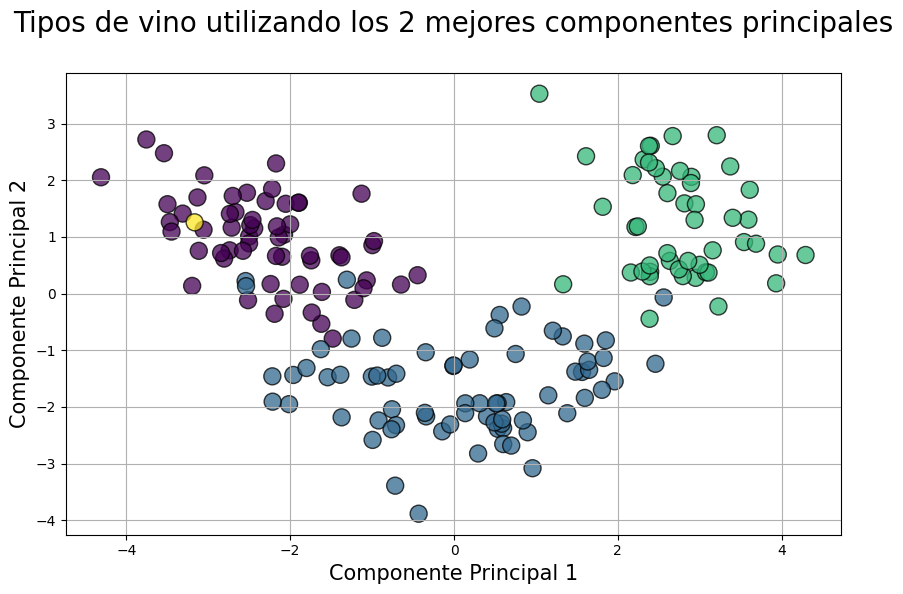

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Tipos de vino utilizando los 2 mejores componentes principales\n",fontsize=20)
plt.xlabel("Componente Principal 1",fontsize=15)
plt.ylabel("Componente Principal 2",fontsize=15)
plt.show()

#**Taller**

1. La empresa Vinos Zungo SA ha liberado un nuevo tipo de vino a base de banano. Luego de llevarlo al laboratorio de analisis de alimento se determinó la siguiente composición para este número producto:

*   Alcohol = 14.03
*   Malic acid = 1.71
*   Ash = 2.41
*   Alcalinity of ash = 15.5
*   Magnesium = 126
*   Total phenols = 2.79
*   Flavanoids = 3.05
*   Nonflavanoid phenols = 0.3
*   Proanthocyanins = 2.3
*   Color intensity = 5.57
*   Hue = 1.04
*   D280/OD315 of diluted wines = 3.82
*  	Proline = 1062

Dado los resultados de laboratorio, a cual tipo de vino pertenece?

#**Tips!**

*  Utilice solo los 3 mejores componentes para realizar su análisis.
*  Utilice kmean para realizar la asignación de tipos de vino

#**Preguntas de interpretación**
*  A cual tipo de vino pertenece?
*  Cambian los resultados si utiliza los 2 **mejores** componentes?
*  Cambian los resultados si utiliza los 5 **mejores** componentes?
*  Cambian los resultados si utiliza los 3 **peores** componentes?

# **2 MEJORES COMPONENTES**

In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]

                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
"""
Ejemplo de uso con datos que tienen 2 características utilizando distancia euclidiana.

- Se convierte un DataFrame en un array NumPy.
- Se inicializa el algoritmo K-Means con 3 clusters.
- Se ejecuta el algoritmo para asignar etiquetas y determinar centroides.
"""

points = np.array(dfx_trans)  # Conversión del DataFrame a array NumPy
kmeans = KMeans(k=3)  # Inicialización con 3 clusters

labels = kmeans.run(points)  # Aplicación del algoritmo K-Means
print(labels)  # Imprime las etiquetas asignadas a cada punto
print(kmeans.centroids)  # Imprime las coordenadas de los centroides finales

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0]
[[-2.29174152  0.93772886]
 [ 0.07251737 -1.75011234]
 [ 2.7445862   1.18236675]]


In [ ]:
"""
Selecciona los puntos que pertenecen al mismo cluster que el último punto.

- Compara cada etiqueta en `labels` con la etiqueta del último punto.
- Devuelve un array booleano indicando qué puntos son vecinos según la agrupación.
"""

mis_vecinos = labels == labels[-1]

In [ ]:
"""
Filtra los puntos vecinos en el DataFrame y encuentra la clase más común.

- `mis_vecinos` es un array booleano que selecciona las filas correspondientes en `df`.
- Se extrae la columna 'Class' de los vecinos y se calcula su moda.
"""

vecis = df.iloc[mis_vecinos]  # Filtra los vecinos en el DataFrame
print(vecis['Class'].mode())  # Imprime la clase más frecuente entre los vecinos


0    1
Name: Class, dtype: int64


In [ ]:
# prompt: calcular la moda de una columna de un dataframe

# Calculate the mode of a column in a DataFrame
def calculate_mode(df, column_name):
  """
  Calculates the mode of a specified column in a Pandas DataFrame.

  Args:
    df: The Pandas DataFrame.
    column_name: The name of the column for which to calculate the mode.

  Returns:
    The mode of the column, or None if the column does not exist or is empty.
  """
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' not found in DataFrame.")
    return None

  column_data = df[column_name]
  if column_data.empty:
    print(f"Error: Column '{column_name}' is empty.")
    return None

  mode_value = column_data.mode()

  if not mode_value.empty:
    return mode_value.iloc[0]  # Return the first mode if multiple exist
  else:
    return None # Handle the case where there's no mode

# Example usage (assuming 'df' is your DataFrame and 'Class' is your column):
mode_of_class = calculate_mode(df, 'Class')

if mode_of_class is not None:
  print(f"The mode of the 'Class' column is: {mode_of_class}")


The mode of the 'Class' column is: 2


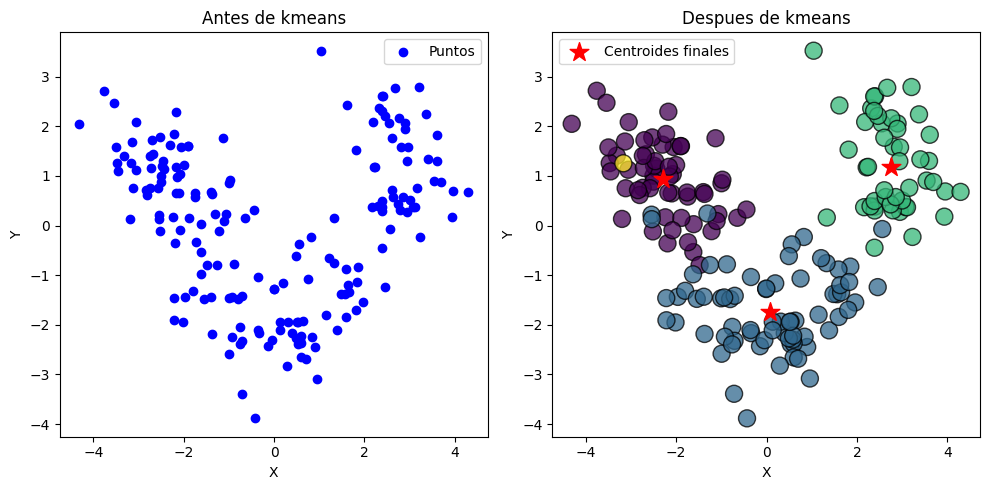

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

#**INTERPRETACIÓN**


Basicamente al realizar el análisis de los 2 mejores componentes y ponerlos  en la gráfico de 2D estamos usando toda la información que acabamos de procesar. Por lo tanto la interpretación es completa, veamos por ejemplo que el vino de banano se encuentra claramente definido en el grupo número 1 con una cercanía considerable al centroide por lo que concluimos que es una clara evidencia de relación pertenencia.
Fuera de ello el solapamiento entre grupo es marcado por el 2do equipo y encontramos que los centroides se encuentran en un centro visiblemente lógico.

#**3 MEJORES ELEMENTOS**


In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 3):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
"""
Aplica análisis de componentes principales (PCA) a los datos.

- Se inicializa PCA con 3 componentes principales.
- Se proyectan los datos `X` en el nuevo espacio reducido.
"""

pca = PCA(n_componentes=3)  # Inicialización con 3 componentes principales
pca_proyeccion = pca.run(X)  # Proyección de los datos en el espacio PCA

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2]


In [ ]:
"""
Convierte la proyección PCA en un DataFrame y muestra las primeras filas.

- Se crea un DataFrame utilizando los datos proyectados por PCA.
- Se imprimen las primeras 10 filas para visualizar la transformación.
"""

dfx_trans = pd.DataFrame(data=pca_proyeccion)  # Conversión de la proyección PCA a DataFrame
dfx_trans.head(10)  # Muestra las primeras 10 filas del DataFrame

,0,1,2
0,-3.312821,1.410403,0.168405
1,-2.190739,-0.358144,2.019291
2,-2.501594,1.006164,-0.989508
3,-3.756309,2.718077,0.170441
4,-0.996828,0.853626,-2.030768
5,-3.048723,2.085505,0.619071
6,-2.439261,1.150364,0.965943
7,-2.055219,1.582926,-0.150742
8,-2.502308,0.885882,1.760789
9,-2.739550,0.762037,0.979337


In [ ]:
"""
Ejemplo de uso con datos que tienen 3 características utilizando distancia euclidiana.

- Se convierte un DataFrame en un array NumPy.
- Se inicializa el algoritmo K-Means con 3 clusters.
- Se ejecuta el algoritmo para asignar etiquetas y calcular los centroides.
"""

points = np.array(dfx_trans)  # Conversión del DataFrame a array NumPy
kmeans = KMeans(k=3)  # Inicialización con 3 clusters

labels = kmeans.run(points)  # Aplicación del algoritmo K-Means
print(labels)  # Imprime las etiquetas asignadas a cada punto
print(kmeans.centroids)  # Imprime las coordenadas de los centroides finales

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2
 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]
[[ 0.29024027 -1.80938485 -0.21333626]
 [ 2.7445862   1.18236675  0.21477122]
 [-2.24121343  0.71659063  0.02987847]]


In [ ]:
"""
Identifica los puntos que pertenecen al mismo cluster que el último punto.

- Compara cada etiqueta en `labels` con la etiqueta del último punto.
- Genera un array booleano donde `True` indica que el punto está en el mismo cluster.
"""

mis_vecinos = labels == labels[-1]

In [ ]:
"""
Filtra los puntos vecinos en el DataFrame y determina la clase más común.

- `mis_vecinos` es un array booleano que selecciona las filas correspondientes en `df`.
- Se extrae la columna 'Class' y se calcula su moda, mostrando la clase más frecuente.
"""

vecis = df.iloc[mis_vecinos]  # Filtra los vecinos en el DataFrame
print(vecis['Class'].mode())  # Imprime la clase más común entre los vecinos

0    1
Name: Class, dtype: int64


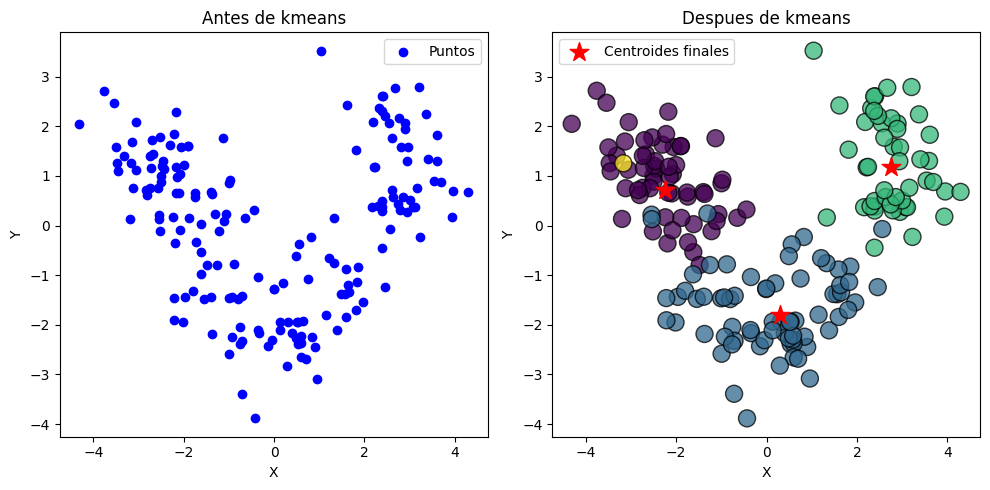

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

Despues de realizar el análisis encontramos que los mejores componentes son los 1,2 y 3 que en el código encontramos como 0, 1 y 2
La grafica anterior nos permite ver de manera clara reduciendo el componente 3 de ASH en que grupo se encuentra nuestro nuevo vino, podemos interpretar por ejemplo que el grupo 1 se encuentra entre los mayores concentrados de alcohol pero con menores proporciones de acido málico. Así basicamente con los 2 primeros componentes podemos quedarnos para entender su comportamiento el cual sigue siendo muy parecido al de los 2 mejores componentes.

# **5 MEJORES COMPONENTES**


In [ ]:
"""
Aplica análisis de componentes principales (PCA) a los datos con 5 componentes.

- Se inicializa PCA con 5 componentes principales.
- Se proyectan los datos `X` en el nuevo espacio reducido.
"""

pca = PCA(n_componentes=5)  # Inicialización con 5 componentes principales
pca_proyeccion = pca.run(X)  # Proyección de los datos en el espacio PCA

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2 3 4]


In [ ]:
"""
Convierte la proyección PCA en un DataFrame y muestra las primeras filas.

- Se crea un DataFrame con los datos transformados por PCA.
- Se visualizan las primeras 10 filas para analizar la estructura resultante.
"""

dfx_trans = pd.DataFrame(data=pca_proyeccion)  # Conversión de la proyección PCA a DataFrame
dfx_trans.head(10)  # Muestra las primeras 10 filas del DataFrame

,0,1,2,3,4
0,-3.312821,1.410403,0.168405,-0.183176,0.690622
1,-2.190739,-0.358144,2.019291,-0.297919,-0.258465
2,-2.501594,1.006164,-0.989508,0.713514,-0.289781
3,-3.756309,2.718077,0.170441,0.559626,-0.354782
4,-0.996828,0.853626,-2.030768,-0.389442,0.315430
5,-3.048723,2.085505,0.619071,-0.538503,-0.632233
6,-2.439261,1.150364,0.965943,-0.113448,-1.025359
7,-2.055219,1.582926,-0.150742,-1.181811,0.125690
8,-2.502308,0.885882,1.760789,0.016724,-0.908356
9,-2.739550,0.762037,0.979337,0.328816,-0.493561


In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]

                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
"""
Ejemplo de uso con datos que tienen 3 características utilizando distancia euclidiana.

- Se convierte un DataFrame en un array NumPy.
- Se inicializa el algoritmo K-Means con 5 clusters.
- Se ejecuta el algoritmo para asignar etiquetas y calcular los centroides.
"""

points = np.array(dfx_trans)  # Conversión del DataFrame a array NumPy
kmeans = KMeans(k=5)  # Inicialización con 5 clusters

labels = kmeans.run(points)  # Aplicación del algoritmo K-Means
print(labels)  # Imprime las etiquetas asignadas a cada punto
print(kmeans.centroids)  # Imprime las coordenadas de los centroides finales

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 0 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 1 4 0 0 1 1 0 0 1 0 2 1 1 3
 0 0 0 1 0 1 0 0 1 4 0 0 1 1 1 1 1 1 1 0 0 3 2 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 1 1 1 1 0 1 4 0 0 1 1 0 0 0 0 1 1 1 2 2 2 2 4 4 4 4 4 4 4 4 4 4 2 4 4 4
 4 2 2 2 2 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 2 4 4 4 4 4 2 2 4 3]
[[-0.55801815 -1.82535539  0.54340723  0.60302331  0.29031462]
 [ 0.58474196 -1.48323324 -1.23587271 -0.43775167 -0.34683385]
 [ 2.19944517  1.30713752  0.11886191 -0.19105677  1.44905915]
 [-2.39155886  0.97396558  0.11248945 -0.1667465  -0.13903527]
 [ 2.88443102  0.96686217  0.26835961  0.11604727 -0.4599931 ]]


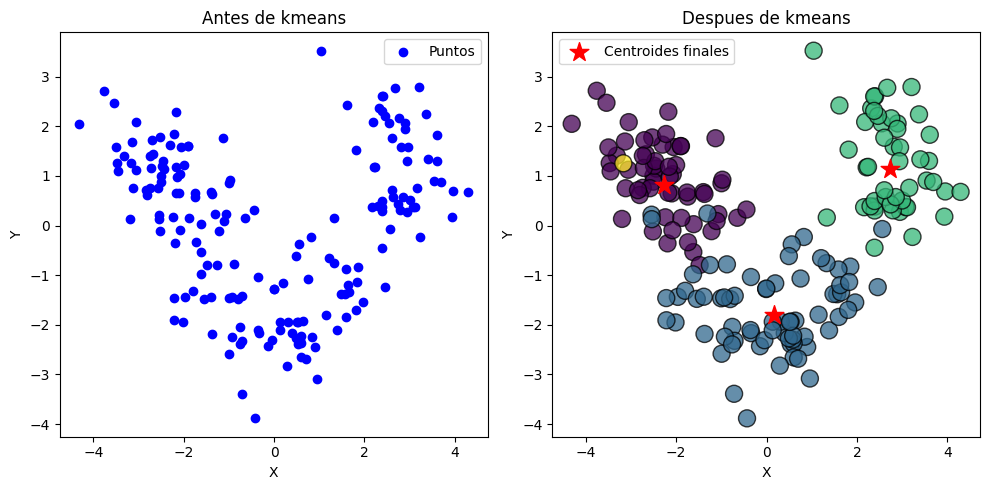

In [ ]:
dibujar2D(points, kmeans.centroids, labels)


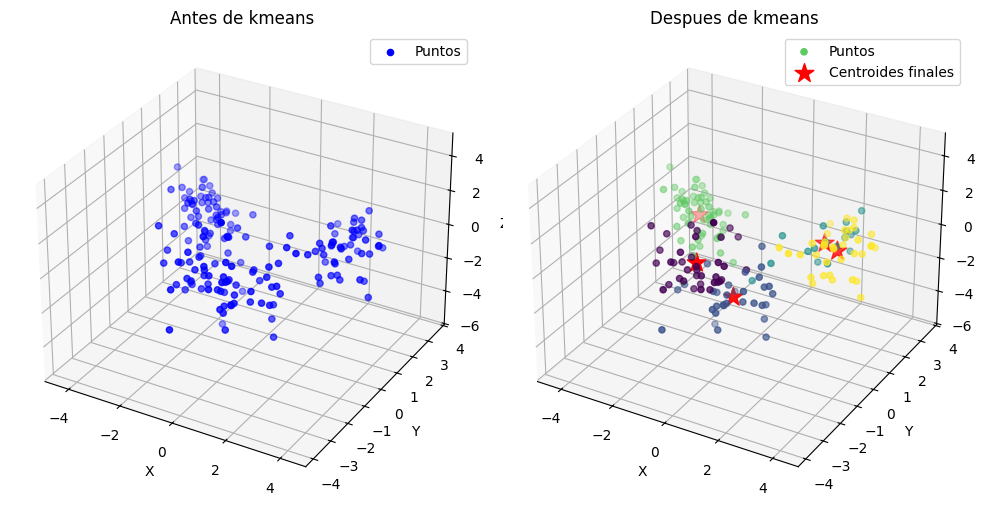

In [ ]:
dibujar3D(points, kmeans.centroids, labels)


Con esta grafica encontramos que es la misma que venimos trabajando ya que obviamente aunque analizamos los 5 mejores componentes volvemos a escoger el componente 1, 2 y 3 para la tabla, pero si por ejemplo cambiamos a una grafica de 3 dimensiones y los componentes que usamos es el 1 3 y 5 se verá una variación en el grupo asignado, pero es una variación que no se encuentra pegada al centroide de ningun grupo como para definir que pertenece claramente a dicho grupo y además encontramos un asolapamiento de varios grupos al tiempo y esto devido a la poca variablidad del componente 5 que es el magnesiumg

si usamos la grafica de 2 dimensiones la grafica será la misma que usamos anteriormente pero en este caso usaremos la grafica de 3 dimensiones para visualizar de mejor manera la variación teniendo en cuenta los componentes 1, 3 y 5 (dado que el componente 5 tiene menos variablilidad)

#**3 PEORES COMPONENTES**


In [ ]:
"""
Aplica análisis de componentes principales (PCA) a los datos con 3 componentes.

- Se inicializa PCA con 3 componentes principales.
- Se proyectan los datos `X` en el nuevo espacio reducido.
"""

pca = PCA(n_componentes=3)  # Inicialización con 3 componentes principales
pca_proyeccion = pca.run(X)  # Proyección de los datos en el espacio PCA

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1 2]


In [ ]:
"""
Obtiene los tres componentes principales con los valores propios más bajos.

- Se ordenan los valores propios de menor a mayor.
- Se seleccionan los índices de los tres peores componentes.
- Se extraen los valores de los tres componentes con menor relevancia.

"""

indices_peores_componentes = np.argsort(pca.valores_propios)[:3]  # Índices de los 3 peores componentes
peores_componentes = pca.valores_propios[indices_peores_componentes]  # Valores propios correspondientes

# Mostrar resultados
print("Índices de los 3 peores componentes:", indices_peores_componentes)
print("Valores de los 3 peores componentes:", peores_componentes)

Índices de los 3 peores componentes: [ 7  9 11]
Valores de los 3 peores componentes: [0.10339464 0.16986414 0.22660028]


In [ ]:
"""
Convierte el DataFrame transformado en un array NumPy para su procesamiento.

- `dfx_trans` es un DataFrame que contiene la proyección PCA de los datos.
- Se transforma en un array NumPy para facilitar cálculos y análisis posteriores.
"""

points = np.array(dfx_trans)

In [ ]:
"""
Ejecuta el algoritmo K-Means para agrupar los datos en 3 clusters.

- Se inicializa el modelo K-Means con 3 clusters.
- Se ejecuta el algoritmo sobre los datos almacenados en `points`.
- Se imprimen las etiquetas asignadas a cada punto y las coordenadas de los centroides finales.
"""

kmeans = KMeans(k=3)  # Inicialización con 3 clusters
labels = kmeans.run(points)  # Aplicación del algoritmo K-Means

print(labels)  # Muestra las etiquetas asignadas a cada punto
print(kmeans.centroids)  # Muestra las coordenadas de los centroides finales

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 0 2 2 2 0
 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[[-2.25759067  0.81287539  0.03714864 -0.14515636 -0.02188121]
 [ 2.72710043  1.14297512  0.2420176   0.06243577  0.07187013]
 [ 0.15998164 -1.80550817 -0.23862432  0.10316283 -0.03582609]]


In [ ]:
"""
Filtra los puntos que pertenecen al mismo cluster que el último punto.

- `mis_vecinos` genera un array booleano indicando qué puntos están en el mismo cluster.
- Se utiliza `iloc` para seleccionar las filas del DataFrame `df` que corresponden a esos puntos.
"""

mis_vecinos = labels == labels[-1]  # Identificación de puntos vecinos
vecis = df.iloc[mis_vecinos]  # Filtrado de puntos en el DataFrame

In [ ]:
"""
Calcula y muestra la moda de la columna 'Class' entre los vecinos.

- Se extrae la columna 'Class' del DataFrame `vecis`, que contiene los puntos vecinos.
- Se calcula la moda para encontrar la clase más frecuente.
- Se imprime el resultado.

"""

print(vecis['Class'].mode())  # Imprime la clase más común entre los vecinos

0    1
Name: Class, dtype: int64


In [ ]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]

                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

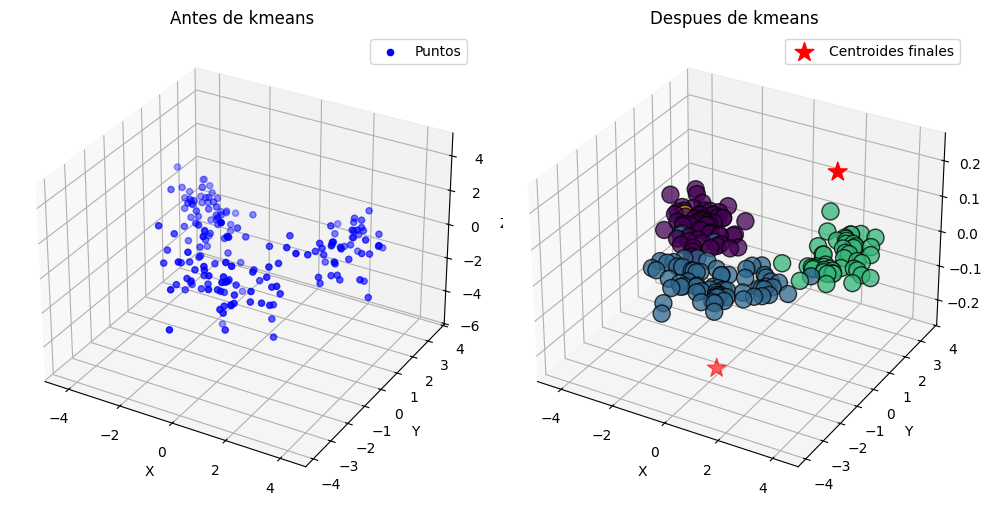

In [ ]:
# Llamar tu visualización 3D
dibujar3D(points, kmeans.centroids, labels)

Por último podemos apreciar que los grupos (haciendo el analisis de los 3 peores componentes) se encuentran muy juntos, esto obviamente porque la variabilidad es muy baja y se puede pensar que no afecta a los resultados en caso de ser utilizados en un analisis, pero entre ellos (los peores) si logramos identificar que la dinamica viene siendo la misma para el vino de banano producido. vemos que los centroides de los grupos 2 y 3 se encuentran lejos de cualquiera de los puntos visibles en el grafico, aun así identificamos que a parte de verse una pertenencia clara al grupo 1 el centroide se encuentra muy seguramente en esta sección ya que visiblemente no lo podemos apreciar.